In [28]:
using PyPlot, Statistics

In [19]:
include("../src/SparseKMeans.jl")
include("../src/RobustKMeans.jl")
include("../src/DataGeneration.jl");

Academic license - for non-commercial use only


In [27]:
p = 10
K = 2
num_trials = 10
n_grid = [100, 500, 1000]
d_grid = [100, 500, 1000, 5000, 10000]
sparse_run_time = zeros(size(n_grid, 1), size(d_grid, 1), num_trials)
robust_run_time = zeros(size(n_grid, 1), size(d_grid, 1), num_trials)
for (i, n) in enumerate(n_grid)
    for (j, d) in enumerate(d_grid)
        for k=1:num_trials
            X, true_assignments, true_features = generate_random_data(n, d, p, K)
            sparse_run_time[i,j,k] = @elapsed sparse_kmeans(X, K, p, num_restarts_per_cut=1, 
                num_restarts_per_solve=2)
            robust_run_time[i,j,k] = @elapsed robust_kmeans(X, K, λ=sqrt(p))
        end
        println("Completed trials with n=$n and d=$d")
    end
end

Completed trials with n=100 and d=100
Completed trials with n=100 and d=500
Completed trials with n=100 and d=1000
Completed trials with n=100 and d=5000
Completed trials with n=100 and d=10000
Completed trials with n=500 and d=100
Completed trials with n=500 and d=500
Completed trials with n=500 and d=1000
Completed trials with n=500 and d=5000
Completed trials with n=500 and d=10000
Completed trials with n=1000 and d=100
Completed trials with n=1000 and d=500
Completed trials with n=1000 and d=1000
Completed trials with n=1000 and d=5000
Completed trials with n=1000 and d=10000


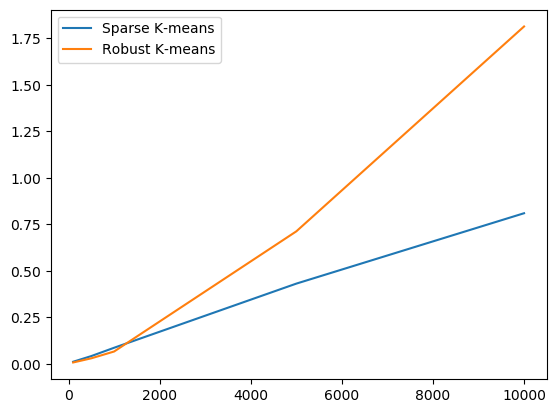

PyObject <matplotlib.legend.Legend object at 0x13d8b8828>

In [35]:
plt.plot(d_grid, [mean(sparse_run_time[1, j, :]) for j=1: size(d_grid, 1)], label="Sparse K-means")
plt.plot(d_grid, [mean(robust_run_time[1, j, :]) for j=1: size(d_grid, 1)], label="Robust K-means")
plt.legend()

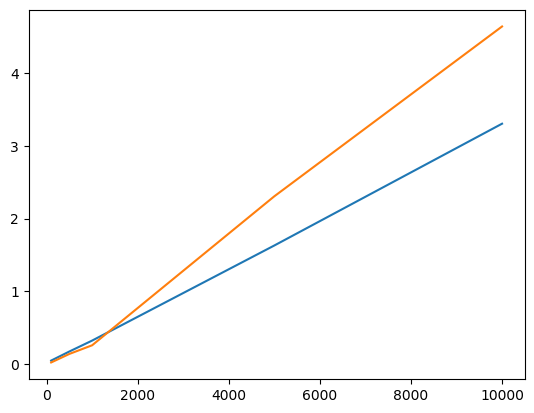

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12548add8>

In [33]:
plt.plot(d_grid, [mean(sparse_run_time[3, j, :]) for j=1: size(d_grid, 1)])
plt.plot(d_grid, [mean(robust_run_time[3, j, :]) for j=1: size(d_grid, 1)])